In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [72]:
# Specify the path to your pickle file
file_path = "../../../dataset/cri_compustat_v8_yfinance.pkl"

# Open the pickle file for reading
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    df = pickle.load(file)

In [73]:
print(df.columns.tolist())

print(len(df. index))

['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic', 'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets', 'asset_turnover', 'inventory_turnover', 'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding', 'working_capital_turnover', 'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio', 'operating_profit_margin', 'ebitda_margin', 'debt_service_coverage_ratio', 'interest_coverage_ratio', 'Rolling_Sortino', 'macd', 'macd_h', 'macd_s', 'rsi']
579815


In [74]:
print(df.shape)
df.sort_values(by='date', inplace=True)
df['Duration'] = df['Duration'].dt.total_seconds() / (24 * 60 * 60)
df.head()

(579815, 57)


CompNo    year  month   StkIndx     STInt  dtdlevel  dtdtrend  \
26661   34285  2000.0     12 -0.097569  0.011896 -0.146043  0.019790   
26663   27327  2000.0     12 -0.097569  0.011896  5.750430  0.381874   
26664   32057  2000.0     12 -0.097569  0.011896  5.927988 -1.331277   
26665   27883  2000.0     12 -0.097569  0.011896  4.086779 -0.043841   
26666   27414  2000.0     12 -0.097569  0.011896  1.097933 -0.412833   

       liqnonfinlevel  liqnonfintrend  ni2talevel  ...  gross_margin_ratio  \
26661       -0.143775        0.135087    0.002171  ...           16.947977   
26663        0.374460       -0.060615    0.007601  ...           41.556943   
26664        0.000000        0.000000    0.020396  ...           40.279483   
26665        0.126502       -0.021101    0.005587  ...           35.082997   
26666        0.533215       -0.083706    0.005802  ...           23.150479   

       operating_profit_margin  ebitda_margin  debt_service_coverage_ratio  \
26661               -83.052023     -56.774871                    -0.495571   
26663               -43.815438     -39.371126                    -0.568841   
26664               -19.441034     -12.899078                    -0.738401   
26665               -49.125168     -44.638852                    -0.678019   
26666               -71.095947     -63.315864                    -0.326258   

       interest_coverage_ratio  Rolling_Sortino      macd    macd_h    macd_s  \
26661                 4.743773        -0.105924 -0.124699 -0.070089 -0.054610   
26663                 6.136400         0.404598  0.692978  0.326974  0.366004   
26664                19.605909         0.139450  0.711065  0.204239  0.506826   
26665                 8.800000         0.449392  3.662068  1.201543  2.460525   
26666                 1.280416        -1.116351 -2.825422 -0.969671 -1.855751   

             rsi  
26661  39.313984  
26663  74.785100  
26664  56.703567  
26665  74.132139  
26666   2.280502  

[5 rows x 57 columns]

In [75]:
df.describe()

CompNo           year          month        StkIndx  \
count  579815.000000  579815.000000  579815.000000  579815.000000   
mean    38090.511918    2012.140783       6.513315       0.062076   
std     11377.716602       6.165273       3.450909       0.169826   
min     22043.000000    2000.000000       1.000000      -0.545579   
25%     29551.000000    2007.000000       4.000000      -0.020346   
50%     34696.000000    2012.000000       6.000000       0.089689   
75%     44597.000000    2017.000000      10.000000       0.154631   
max     93119.000000    2023.000000      12.000000       0.713380   

               STInt       dtdlevel       dtdtrend  liqnonfinlevel  \
count  579815.000000  579815.000000  579815.000000   579815.000000   
mean       -0.006332       4.834042      -0.002940        0.644890   
std         0.006107       3.062458       1.288000        0.798840   
min        -0.012097      -1.113511     -35.341088       -4.156714   
25%        -0.011189       2.672273      -0.645188        0.000000   
50%        -0.008279       4.290945       0.013210        0.543089   
75%        -0.004017       6.431807       0.673169        1.092096   
max         0.011896      57.489603      14.933724        4.787727   

       liqnonfintrend     ni2talevel  ...  gross_margin_ratio  \
count   579815.000000  579815.000000  ...        5.798150e+05   
mean        -0.007346      -0.002482  ...       -4.146300e+04   
std          0.263788       0.038245  ...        4.632728e+05   
min         -2.559415      -1.324832  ...       -5.251700e+06   
25%         -0.073359      -0.001063  ...        2.028550e+01   
50%          0.000000       0.002725  ...        3.482704e+01   
75%          0.062196       0.006348  ...        5.383416e+01   
max          2.683886       0.216094  ...        2.669000e+05   

       operating_profit_margin  ebitda_margin  debt_service_coverage_ratio  \
count             5.798150e+05   5.798150e+05                579815.000000   
mean             -7.459050e+05  -7.385284e+05                -19457.365745   
std               3.969754e+06   3.946962e+06                 50178.724283   
min              -2.189250e+07  -2.185540e+07               -149041.103448   
25%              -7.487303e+01  -7.065115e+01                    -2.772098   
50%              -5.277760e+01  -4.685100e+01                    -0.526545   
75%              -2.447970e+01  -1.554867e+01                    -0.090107   
max               5.337000e+05   5.158000e+05                  5576.666667   

       interest_coverage_ratio  Rolling_Sortino          macd        macd_h  \
count            579815.000000    579815.000000  5.798150e+05  5.798150e+05   
mean             -16342.460899         0.124072 -4.942828e+03  4.736845e+02   
std               67969.414248         0.424558  4.493841e+05  7.970173e+04   
min             -297211.000000        -3.668555 -7.579692e+07 -1.979324e+07   
25%                   1.591837        -0.146532 -8.683099e-01 -3.123225e-01   
50%                   5.633588         0.123174  1.921574e-01  4.905889e-02   
75%                  16.083321         0.393310  1.849526e+00  4.935565e-01   
max              132673.500000         4.643673  1.413573e+06  9.948563e+06   

             macd_s            rsi  
count  5.798150e+05  579815.000000  
mean  -5.416513e+03      53.683951  
std    4.627129e+05      16.600795  
min   -6.776329e+07       0.000000  
25%   -7.807702e-01      41.478064  
50%    2.057825e-01      53.150919  
75%    1.772713e+00      65.616517  
max    1.078488e+06     100.000000  

[8 rows x 53 columns]

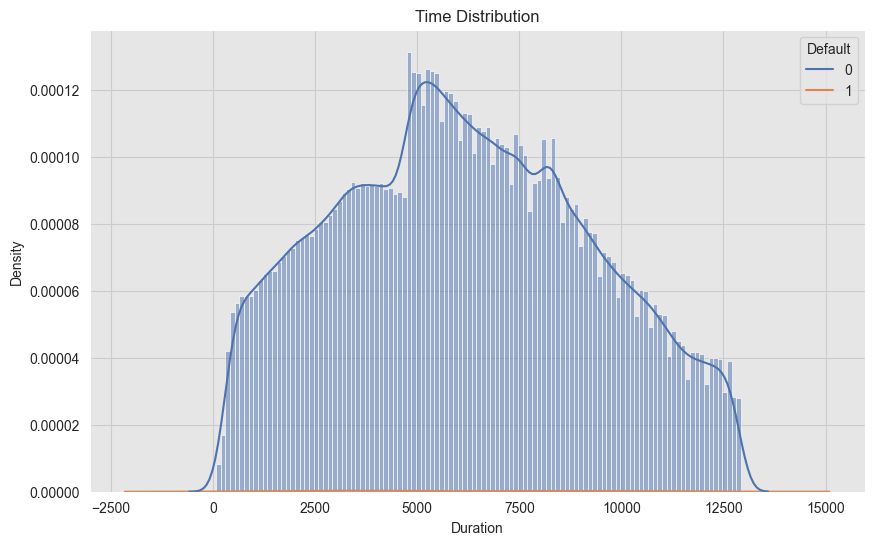

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram with the 'EventType' hue
sns.histplot(data=df, x='Duration', hue='Default', stat='density', ax=ax)

# Create the KDE plot with the 'EventType' hue
sns.kdeplot(data=df, x='Duration', hue='Default', fill=False, ax=ax)

# Set the title
ax.set_title('Time Distribution')

# Show the plot
plt.show()


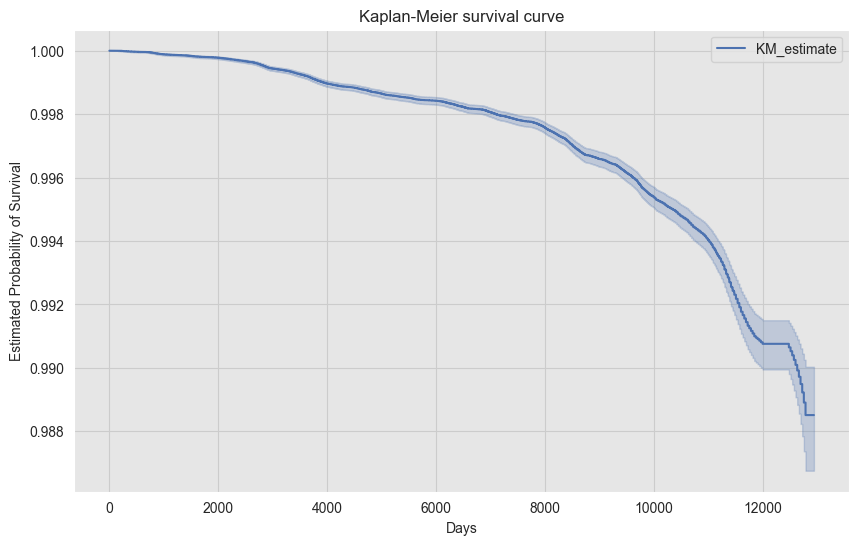

In [77]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations=df['Duration'], event_observed=df['Default'])

fig, ax =  plt.subplots()
kmf.plot_survival_function(color='C0',ax=ax)
ax.set(
    title='Kaplan-Meier survival curve',
    xlabel='Days',
    ylabel='Estimated Probability of Survival'
);

In [78]:
df.columns

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day',
       'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic',
       'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital',
       'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio',
       'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets',
       'asset_turnover', 'inventory_turnover', 'days_in_inventory',
       'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio',
       'Rolling_Sortino', 'macd', 'macd_h', 'macd

C:\Users\Melissa\AppData\Local\Temp\ipykernel_24280\3746533019.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


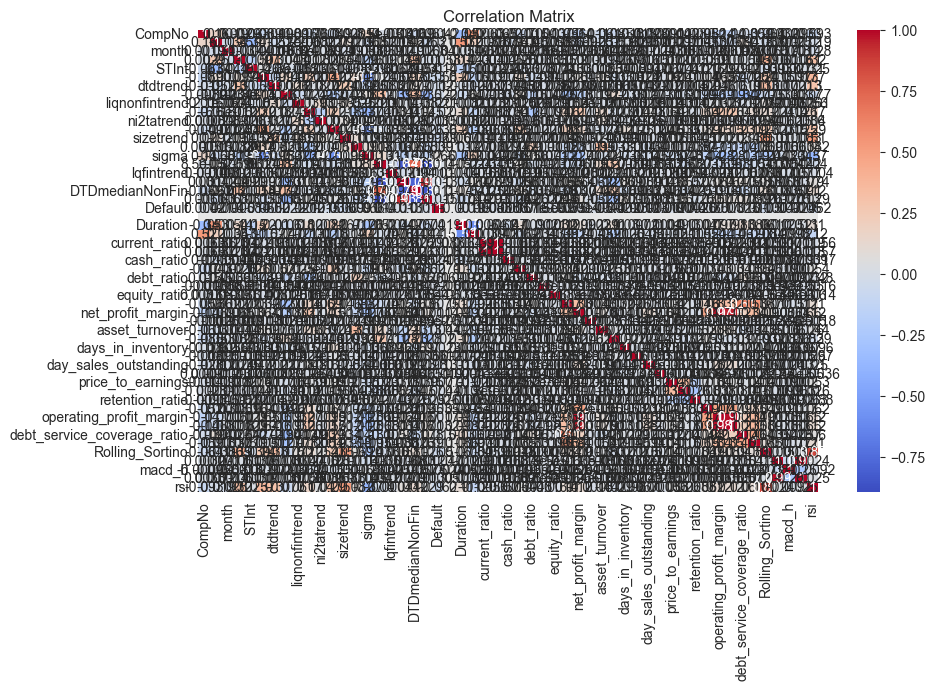

In [79]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [80]:
# Print pairs of features with correlations above 0.9
threshold = 0.9
correlation_pairs = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
            correlation_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

if correlation_pairs:
    print("Correlations above 0.9:")
    for col1, col2, corr in correlation_pairs:
        print(f"Columns {col1} and {col2} have a correlation of {corr}")
else:
    print("No correlations above 0.9 found.")


Correlations above 0.9:
Columns DTDmedianFin and dummy297fin have a correlation of 0.934767618571682
Columns dummy297fin and DTDmedianFin have a correlation of 0.934767618571682
Columns current_ratio and quick_ratio have a correlation of 0.9999800782439607
Columns quick_ratio and current_ratio have a correlation of 0.9999800782439607
Columns net_profit_margin and operating_profit_margin have a correlation of 0.9725500872089449
Columns net_profit_margin and ebitda_margin have a correlation of 0.9537083110706446
Columns operating_profit_margin and net_profit_margin have a correlation of 0.9725500872089449
Columns operating_profit_margin and ebitda_margin have a correlation of 0.9799125441452414
Columns ebitda_margin and net_profit_margin have a correlation of 0.9537083110706446
Columns ebitda_margin and operating_profit_margin have a correlation of 0.9799125441452414
Columns macd and macd_s have a correlation of 0.9851523687573126
Columns macd_s and macd have a correlation of 0.985152368

In [81]:
df.drop(["quick_ratio", "operating_profit_margin", "ebitda_margin", "dummy297fin", "macd_s"], axis=1, inplace=True)


In [82]:
correlation_matrix = df.corr()
threshold = 0.9
correlation_pairs = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
            correlation_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

if correlation_pairs:
    print("Correlations above 0.9:")
    for col1, col2, corr in correlation_pairs:
        print(f"Columns {col1} and {col2} have a correlation of {corr}")
else:
    print("No correlations above 0.9 found.")

C:\Users\Melissa\AppData\Local\Temp\ipykernel_24280\2549217585.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


No correlations above 0.9 found.


In [83]:
print(df.columns.tolist())

print(len(df. index))

['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic', 'current_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets', 'asset_turnover', 'inventory_turnover', 'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding', 'working_capital_turnover', 'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio', 'debt_service_coverage_ratio', 'interest_coverage_ratio', 'Rolling_Sortino', 'macd', 'macd_h', 'rsi']
579815


In [84]:
df.drop(["year", "month", "gvkey", "StartDate", "EventDate", "tic", "day"], axis=1, inplace=True)


In [85]:
# import statsmodels
# from statsmodels.stats.outliers_influence import variance_inflation_factor


# def calculate_vif(data_frame):
#     vif_data = pd.DataFrame()
#     vif_data["Variable"] = data_frame.columns
#     vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
#     return vif_data

# # Select only the numeric columns if necessary (VIF is not applicable to non-numeric columns)
# numeric_columns = df[selected_features].select_dtypes(include=[pd.np.number])

# # Calculate VIF for the numeric columns
# vif_result = calculate_vif(df[selected_features])

# # Convert the VIF result DataFrame to a list of lists
# vif_result_list = vif_result.values.tolist()

# print(vif_result_list)

In [86]:
from datetime import datetime

date2022 = datetime(2022, 1, 1)
train_df = df[df["date"] < date2022]
test_df = df[df["date"] >= date2022]
print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)

train_df shape: (546187, 45)
test_df shape: (33628, 45)


In [87]:
test_df.groupby('Default')["CompNo"].count()

Default
0    33509
1      119
Name: CompNo, dtype: int64

In [88]:
156/(36381+156)

0.004269644469989326

In [89]:
val_date = datetime(2020, 1, 1)

val_df = train_df[train_df["date"] >= val_date]
train_df = train_df[train_df["date"] < val_date]
print("train_df shape:", train_df.shape)
print("val_df shape:", val_df.shape)

train_df shape: (493390, 45)
val_df shape: (52797, 45)


In [90]:
train_df.groupby("Default")["CompNo"].count()

Default
0    492317
1      1073
Name: CompNo, dtype: int64

In [91]:
8850/(1075728+8850)

0.008159855722686613

In [92]:
val_df.groupby('Default')["CompNo"].count()

Default
0    52647
1      150
Name: CompNo, dtype: int64

In [93]:
316/(57983+316)

0.005420333110344946

In [94]:
print(train_df.columns)


Index(['CompNo', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel',
       'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend',
       'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin',
       'DTDmedianNonFin', 'Default', 'date', 'Duration', 'current_ratio',
       'cash_ratio', 'net_working_capital', 'debt_ratio',
       'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio',
       'net_profit_margin', 'return_on_assets', 'asset_turnover',
       'inventory_turnover', 'days_in_inventory', 'receivables_turnover',
       'day_sales_outstanding', 'working_capital_turnover',
       'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio',
       'gross_margin_ratio', 'debt_service_coverage_ratio',
       'interest_coverage_ratio', 'Rolling_Sortino', 'macd', 'macd_h', 'rsi'],
      dtype='object')


In [95]:
train_df.drop(["CompNo", "date"], axis=1, inplace=True)
val_df.drop(["CompNo", "date"], axis=1, inplace=True)
test_df.drop(["CompNo", "date"], axis=1, inplace=True)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_24280\3108148843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(["CompNo", "date"], axis=1, inplace=True)


In [96]:
train_df.head()

StkIndx     STInt  dtdlevel  dtdtrend  liqnonfinlevel  liqnonfintrend  \
26661 -0.097569  0.011896 -0.146043  0.019790       -0.143775        0.135087   
26663 -0.097569  0.011896  5.750430  0.381874        0.374460       -0.060615   
26664 -0.097569  0.011896  5.927988 -1.331277        0.000000        0.000000   
26665 -0.097569  0.011896  4.086779 -0.043841        0.126502       -0.021101   
26666 -0.097569  0.011896  1.097933 -0.412833        0.533215       -0.083706   

       ni2talevel  ni2tatrend  sizelevel  sizetrend  ...  price_to_earnings  \
26661    0.002171    0.008310  -2.161520   0.244958  ...         -34.375000   
26663    0.007601   -0.000435   3.970399   0.250796  ...         113.958333   
26664    0.020396   -0.004645   3.543223   0.044544  ...          98.292093   
26665    0.005587   -0.000883   3.537167   0.197090  ...          41.919192   
26666    0.005802    0.001150   0.279692  -0.451132  ...          47.916667   

       dividend_payout_ratio  retention_ratio  gross_margin_ratio  \
26661              -0.000000         1.000000           16.947977   
26663               0.033333         0.966667           41.556943   
26664               0.302326         0.697674           40.279483   
26665               0.202020         0.797980           35.082997   
26666               0.000000         1.000000           23.150479   

       debt_service_coverage_ratio  interest_coverage_ratio  Rolling_Sortino  \
26661                    -0.495571                 4.743773        -0.105924   
26663                    -0.568841                 6.136400         0.404598   
26664                    -0.738401                19.605909         0.139450   
26665                    -0.678019                 8.800000         0.449392   
26666                    -0.326258                 1.280416        -1.116351   

           macd    macd_h        rsi  
26661 -0.124699 -0.070089  39.313984  
26663  0.692978  0.326974  74.785100  
26664  0.711065  0.204239  56.703567  
26665  3.662068  1.201543  74.132139  
26666 -2.825422 -0.969671   2.280502  

[5 rows x 43 columns]

In [97]:
train_X = train_df
train_X.dropna(inplace=True)
val_X = val_df
val_X.dropna(inplace=True)
test_X = test_df
test_X.dropna(inplace=True)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_24280\890013741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X.dropna(inplace=True)


In [98]:
train_X.head()

StkIndx     STInt  dtdlevel  dtdtrend  liqnonfinlevel  liqnonfintrend  \
26661 -0.097569  0.011896 -0.146043  0.019790       -0.143775        0.135087   
26663 -0.097569  0.011896  5.750430  0.381874        0.374460       -0.060615   
26664 -0.097569  0.011896  5.927988 -1.331277        0.000000        0.000000   
26665 -0.097569  0.011896  4.086779 -0.043841        0.126502       -0.021101   
26666 -0.097569  0.011896  1.097933 -0.412833        0.533215       -0.083706   

       ni2talevel  ni2tatrend  sizelevel  sizetrend  ...  price_to_earnings  \
26661    0.002171    0.008310  -2.161520   0.244958  ...         -34.375000   
26663    0.007601   -0.000435   3.970399   0.250796  ...         113.958333   
26664    0.020396   -0.004645   3.543223   0.044544  ...          98.292093   
26665    0.005587   -0.000883   3.537167   0.197090  ...          41.919192   
26666    0.005802    0.001150   0.279692  -0.451132  ...          47.916667   

       dividend_payout_ratio  retention_ratio  gross_margin_ratio  \
26661              -0.000000         1.000000           16.947977   
26663               0.033333         0.966667           41.556943   
26664               0.302326         0.697674           40.279483   
26665               0.202020         0.797980           35.082997   
26666               0.000000         1.000000           23.150479   

       debt_service_coverage_ratio  interest_coverage_ratio  Rolling_Sortino  \
26661                    -0.495571                 4.743773        -0.105924   
26663                    -0.568841                 6.136400         0.404598   
26664                    -0.738401                19.605909         0.139450   
26665                    -0.678019                 8.800000         0.449392   
26666                    -0.326258                 1.280416        -1.116351   

           macd    macd_h        rsi  
26661 -0.124699 -0.070089  39.313984  
26663  0.692978  0.326974  74.785100  
26664  0.711065  0.204239  56.703567  
26665  3.662068  1.201543  74.132139  
26666 -2.825422 -0.969671   2.280502  

[5 rows x 43 columns]

In [99]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Select only the numeric columns if necessary (VIF is not applicable to non-numeric columns)
numeric_columns = df.select_dtypes(include=[pd.np.number])

# Calculate VIF for the numeric columns
vif_result = calculate_vif(train_X)

# Convert the VIF result DataFrame to a list of lists
vif_result_list = vif_result.values.tolist()

print(vif_result_list)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_24280\304942090.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  numeric_columns = df.select_dtypes(include=[pd.np.number])


[['StkIndx', 2.2624047738806925], ['STInt', 2.097101543268221], ['dtdlevel', 7.2800387349003834], ['dtdtrend', 1.276280380943684], ['liqnonfinlevel', 2.4941433570166365], ['liqnonfintrend', 1.0523351154188065], ['ni2talevel', 1.4498955295863902], ['ni2tatrend', 1.0943235785007703], ['sizelevel', 2.0035080417225526], ['sizetrend', 1.5454192077655236], ['m2b', 1.7305809907523413], ['sigma', 4.900806991790732], ['liqfinlevel', 4.325772257057241], ['lqfintrend', 1.0038976435148421], ['DTDmedianFin', 6.968514195744871], ['DTDmedianNonFin', 24.83961164702954], ['Default', 1.014745332072949], ['Duration', 5.841690015588521], ['current_ratio', 1.002439200997364], ['cash_ratio', 1.003194928351698], ['net_working_capital', 1.1147983517192481], ['debt_ratio', 1.1932291619953401], ['debt_to_equity_ratio', 1.000127869615306], ['equity_ratio', 1.000717973046242], ['cashflow_to_debt_ratio', 2.079357562780823], ['net_profit_margin', 1.6724605975886722], ['return_on_assets', 1.0001229108419263], ['asse

In [100]:
print(train_X.columns)

Index(['StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel',
       'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend',
       'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin',
       'DTDmedianNonFin', 'Default', 'Duration', 'current_ratio', 'cash_ratio',
       'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio',
       'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin',
       'return_on_assets', 'asset_turnover', 'inventory_turnover',
       'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'debt_service_coverage_ratio', 'interest_coverage_ratio',
       'Rolling_Sortino', 'macd', 'macd_h', 'rsi'],
      dtype='object')


In [101]:
# # Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
from lifelines import CoxPHFitter
from sklearn.metrics import roc_auc_score, accuracy_score

cph_list = []
train_auc = []
val_auc = []

# cph = CoxPHFitter()   
# cph.fit(df_selected_features, duration_col="DaysDuration", event_col="EventType")
# cph.print_summary()   

step_size = [0.01, 0.05, 0.1, 0.2]
penalizer = [0, 0.1, 0.5, 0.7]
l1_ratio = [0, 1.0]

cph = CoxPHFitter(penalizer=0.5, l1_ratio=1.0)
cph.fit(train_X, 'Duration', event_col='Default', fit_options={'step_size': 0.05})

available_keys = cph.baseline_hazard_['baseline hazard'].keys()
print("Available keys in 'baseline hazard' dictionary:", available_keys)

# baseline_haz = cph.baseline_hazard_['baseline hazard'][12.0]

c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['STInt'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Available keys in 'baseline hazard' dictionary: Float64Index([   77.0,    82.0,    90.0,    91.0,    92.0,    93.0,    94.0,
                 95.0,    96.0,    97.0,
              ...
              11650.0, 11651.0, 11652.0, 11653.0, 11655.0, 11656.0, 11681.0,
              11682.0, 11683.0, 11684.0],
             dtype='float64', length=11252)


In [102]:
# Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
from lifelines import CoxPHFitter
from sklearn.metrics import roc_auc_score, accuracy_score

cph_list = []
train_auc = []
val_auc = []

# cph = CoxPHFitter()
# cph.fit(df_selected_features, duration_col="DaysDuration", event_col="EventType")
# cph.print_summary()   

step_size = [0.01, 0.05, 0.1, 0.2]
penalizer = [0, 0.1, 0.5, 0.7]
l1_ratio = [0, 1.0]

for s in step_size:
    for p in penalizer:
        for l in l1_ratio:
            if l == 0:
                if p == 0:
                    cph = CoxPHFitter()
                else:
                    cph = CoxPHFitter(penalizer=p)
            else:
                cph = CoxPHFitter(penalizer=p, l1_ratio=l)

            cph.fit(train_X, 'Duration', event_col='Default', fit_options={'step_size': s})

            baseline_haz = cph.baseline_hazard_['baseline hazard'][365.0]
            x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
            x_pred = np.transpose(x_pred)
            train_auc.append(roc_auc_score(train_X['Default'], x_pred))
            val_x_pred = np.array(cph.predict_partial_hazard(val_X)) * baseline_haz
            val_x_pred = np.transpose(val_x_pred)
            val_auc.append(roc_auc_score(val_X['Default'], val_x_pred))

            cph_list.append({'cph': cph, 'step_size': s, 'penalizer': p, 'l1_ratio': l})
            

c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['STInt'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column equity_ratio have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Default'].astype(bool)
>>> print(df.loc[events, 'equity_ratio'].var())
>>> print(df.loc[~events, 'equity_ratio'].var())

A very low variance means that the column equity_ratio completely determines whether a subject dies or not. See https://stats.stack

In [113]:
m = max(train_auc)
print(m)
[i for i, j in enumerate(train_auc) if j == m]

0.5


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [114]:
m = max(val_auc)
print(m)
[i for i, j in enumerate(val_auc) if j == m]

0.5


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [115]:
cph_list[16]

{'cph': <lifelines.CoxPHFitter: fitted with 493390 total observations, 492317 right-censored observations>,
 'step_size': 0.1,
 'penalizer': 0,
 'l1_ratio': 0}

In [116]:
cph_list[17]

{'cph': <lifelines.CoxPHFitter: fitted with 493390 total observations, 492317 right-censored observations>,
 'step_size': 0.1,
 'penalizer': 0,
 'l1_ratio': 1.0}

In [117]:
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 493390 total observations, 492317 right-censored observations>
             duration col = 'Duration'
                event col = 'Default'
                penalizer = 0.7
                 l1 ratio = 1.0
      baseline estimation = breslow
   number of observations = 493390
number of events observed = 1073
   partial log-likelihood = -13101.98
         time fit was run = 2023-11-06 16:46:39 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
StkIndx                      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
STInt                        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
dtdlevel                     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
dtdtrend                     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
liqnonfinlevel               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
liqnonfintrend               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ni2talevel                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ni2tatrend                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sizelevel                    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sizetrend                    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
m2b                          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sigma                         0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
liqfinlevel                   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
lqfintrend                    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DTDmedianFin                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DTDmedianNonFin               0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
current_ratio                -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cash_ratio                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_working_capital          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
debt_ratio                    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
debt_to_equity_ratio          0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
equity_ratio                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cashflow_to_debt_ratio        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_profit_margin             0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
return_on_assets              0.00       1.00       0.00            -0.00             0.00             

In [118]:
x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
x_pred = np.transpose(x_pred)
x_pred.shape

(493390,)

In [119]:
roc_auc_score(train_df['Default'], x_pred)

0.5

In [120]:
baseline_haz = cph.baseline_hazard_['baseline hazard'][365.0]
test_x_pred = np.array(cph.predict_partial_hazard(test_X)) * baseline_haz
test_x_pred = np.transpose(test_x_pred)
test_x_pred.shape

(33628,)

In [121]:
print(test_x_pred.min())
print(test_x_pred.max())


0.0
0.0


In [122]:
roc_auc_score(test_df['Default'], test_x_pred)


0.5